In [262]:
import pandas as pd
import numpy as np
import datetime 
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
TotalCases = pd.read_csv("https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/export?format=csv&gid=0")

In [147]:
LineList= pd.read_csv("https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/export?format=csv&gid=1187587451")

In [148]:
ProvinceIncidence= pd.read_csv("https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/export?format=csv&gid=1837322948")

In [149]:
IncidentLog = pd.read_csv("https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/export?format=csv&gid=1202885709")

In [150]:
IncidentLogSecond= pd.read_csv("https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/export?format=csv&gid=1180262595")

In [151]:
TotalCases.head(5)

,Province,Confirmed,Suspected,Death,Recovered,Link,Comments
0,Total,40339.0,23589.0,909.0,3471.0,http://3g.dxy.cn/newh5/view/pneumonia,NaN
1,Hubei,29631.0,NaN,NaN,NaN,NaN,NaN
2,Guangdong,1159.0,NaN,NaN,NaN,NaN,NaN
3,Zhejiang,1092.0,NaN,NaN,NaN,NaN,NaN
4,Henan,1073.0,NaN,NaN,NaN,NaN,NaN


In [154]:
LineList.head(5)

,Unnamed: 1,contact.sunky@gmail.com,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,case_in_country,reporting date,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,source
1,NaN,1/20/2020,China,male,66,1/3/2020,0,1/11/2020,12/29/2019,1/4/2020,NaN,1,0,0,0,NaN,Shenzhen Municipal Health Commission
2,NaN,1/20/2020,China,female,56,1/15/2020,0,1/15/2020,NaN,1/12/2020,NaN,0,1,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...
3,NaN,1/21/2020,China,male,46,1/4/2020,0,1/17/2020,NaN,1/3/2020,NaN,0,1,0,0,NaN,Health Commission of Zhejiang Province
4,NaN,1/21/2020,China,female,60,NaN,NaN,1/19/2020,NaN,NaN,NaN,1,0,0,0,NaN,人民日报官方微博


In [155]:
# Dropping columns 
LineList.head(5)
LineList.drop(columns=["Unnamed: 19"] ,axis=1, inplace=True)
#LineList.drop(columns=["Email","Unnamed: 3","Email was incorrect before","Unnamed: 20"] ,axis=1, inplace=True)

In [156]:
LineList.head(5)

,Unnamed: 1,contact.sunky@gmail.com,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,case_in_country,reporting date,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom
1,NaN,1/20/2020,China,male,66,1/3/2020,0,1/11/2020,12/29/2019,1/4/2020,NaN,1,0,0,0,NaN
2,NaN,1/20/2020,China,female,56,1/15/2020,0,1/15/2020,NaN,1/12/2020,NaN,0,1,0,0,NaN
3,NaN,1/21/2020,China,male,46,1/4/2020,0,1/17/2020,NaN,1/3/2020,NaN,0,1,0,0,NaN
4,NaN,1/21/2020,China,female,60,NaN,NaN,1/19/2020,NaN,NaN,NaN,1,0,0,0,NaN


In [ ]:
# Renaming columns

In [159]:
LineList = LineList.rename(columns={"Unnamed: 1": "Case In Country","Unnamed: 5": "Country","contact.sunky@gmail.com": "reporting date","Unnamed: 5": "country","Unnamed: 6":"gender", "Unnamed: 7":"age","Unnamed: 8": "symptom_onset", "Unnamed: 9":"If_onset_approximated","Unnamed: 10": "hosp_visit_date","Unnamed: 11":"exposure_start","Unnamed: 12": "exposure_end", "Unnamed: 13":"traveler","Unnamed: 14":"visiting Wuhan","Unnamed: 15": "from Wuhan","Unnamed: 16": "death","Unnamed: 17": "recovered","Unnamed: 18": "symptom"})

In [160]:
LineList.head(5)

,Case In Country,reporting date,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom
0,case_in_country,reporting date,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom
1,NaN,1/20/2020,China,male,66,1/3/2020,0,1/11/2020,12/29/2019,1/4/2020,NaN,1,0,0,0,NaN
2,NaN,1/20/2020,China,female,56,1/15/2020,0,1/15/2020,NaN,1/12/2020,NaN,0,1,0,0,NaN
3,NaN,1/21/2020,China,male,46,1/4/2020,0,1/17/2020,NaN,1/3/2020,NaN,0,1,0,0,NaN
4,NaN,1/21/2020,China,female,60,NaN,NaN,1/19/2020,NaN,NaN,NaN,1,0,0,0,NaN


In [161]:
LineList.drop(0, inplace = True)

In [162]:
LineList.head(5)


,Case In Country,reporting date,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom
1,NaN,1/20/2020,China,male,66,1/3/2020,0,1/11/2020,12/29/2019,1/4/2020,NaN,1,0,0,0,NaN
2,NaN,1/20/2020,China,female,56,1/15/2020,0,1/15/2020,NaN,1/12/2020,NaN,0,1,0,0,NaN
3,NaN,1/21/2020,China,male,46,1/4/2020,0,1/17/2020,NaN,1/3/2020,NaN,0,1,0,0,NaN
4,NaN,1/21/2020,China,female,60,NaN,NaN,1/19/2020,NaN,NaN,NaN,1,0,0,0,NaN
5,NaN,1/21/2020,China,male,58,NaN,NaN,1/14/2020,NaN,NaN,NaN,0,0,0,0,NaN


In [163]:
LineList.shape

(1652, 16)

In [164]:
#Converting fields to dates
#LineList['reporting date']= pd.to_datetime(LineList['reporting date'])
LineList[['reporting date','symptom_onset','hosp_visit_date','exposure_start','exposure_end']] = LineList[['reporting date','symptom_onset','hosp_visit_date','exposure_start','exposure_end']].apply(pd.to_datetime)


In [166]:
LineList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652 entries, 1 to 1652
Data columns (total 16 columns):
Case In Country          1450 non-null object
reporting date           1651 non-null datetime64[ns]
country                  1560 non-null object
gender                   1200 non-null object
age                      1110 non-null object
symptom_onset            656 non-null datetime64[ns]
If_onset_approximated    633 non-null object
hosp_visit_date          593 non-null datetime64[ns]
exposure_start           149 non-null datetime64[ns]
exposure_end             418 non-null datetime64[ns]
traveler                 574 non-null object
visiting Wuhan           1560 non-null object
from Wuhan               1556 non-null object
death                    1560 non-null object
recovered                1560 non-null object
symptom                  338 non-null object
dtypes: datetime64[ns](5), object(11)
memory usage: 299.4+ KB


In [167]:
LineList.head()

,Case In Country,reporting date,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom
1,NaN,2020-01-20,China,male,66,2020-01-03,0,2020-01-11,2019-12-29,2020-01-04,NaN,1,0,0,0,NaN
2,NaN,2020-01-20,China,female,56,2020-01-15,0,2020-01-15,NaT,2020-01-12,NaN,0,1,0,0,NaN
3,NaN,2020-01-21,China,male,46,2020-01-04,0,2020-01-17,NaT,2020-01-03,NaN,0,1,0,0,NaN
4,NaN,2020-01-21,China,female,60,NaT,NaN,2020-01-19,NaT,NaT,NaN,1,0,0,0,NaN
5,NaN,2020-01-21,China,male,58,NaT,NaN,2020-01-14,NaT,NaT,NaN,0,0,0,0,NaN


In [168]:
LineList.shape

(1652, 16)

In [169]:
LineList.isna().sum()

Case In Country           202
reporting date              1
country                    92
gender                    452
age                       542
symptom_onset             996
If_onset_approximated    1019
hosp_visit_date          1059
exposure_start           1503
exposure_end             1234
traveler                 1078
visiting Wuhan             92
from Wuhan                 96
death                      92
recovered                  92
symptom                  1314
dtype: int64

In [170]:
LineList.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652 entries, 1 to 1652
Data columns (total 16 columns):
Case In Country          1450 non-null object
reporting date           1651 non-null datetime64[ns]
country                  1560 non-null object
gender                   1200 non-null object
age                      1110 non-null object
symptom_onset            656 non-null datetime64[ns]
If_onset_approximated    633 non-null object
hosp_visit_date          593 non-null datetime64[ns]
exposure_start           149 non-null datetime64[ns]
exposure_end             418 non-null datetime64[ns]
traveler                 574 non-null object
visiting Wuhan           1560 non-null object
from Wuhan               1556 non-null object
death                    1560 non-null object
recovered                1560 non-null object
symptom                  338 non-null object
dtypes: datetime64[ns](5), object(11)
memory usage: 299.4+ KB


In [171]:
LineList.head(5)

,Case In Country,reporting date,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom
1,NaN,2020-01-20,China,male,66,2020-01-03,0,2020-01-11,2019-12-29,2020-01-04,NaN,1,0,0,0,NaN
2,NaN,2020-01-20,China,female,56,2020-01-15,0,2020-01-15,NaT,2020-01-12,NaN,0,1,0,0,NaN
3,NaN,2020-01-21,China,male,46,2020-01-04,0,2020-01-17,NaT,2020-01-03,NaN,0,1,0,0,NaN
4,NaN,2020-01-21,China,female,60,NaT,NaN,2020-01-19,NaT,NaT,NaN,1,0,0,0,NaN
5,NaN,2020-01-21,China,male,58,NaT,NaN,2020-01-14,NaT,NaT,NaN,0,0,0,0,NaN


In [201]:
LineListComplete= LineList.dropna()
symptondf= LineList[LineList['symptom'].notnull()]

In [202]:
#DF with no missing days. 
DaysComplete =LineList[LineList['hosp_visit_date'].notnull() & LineList['exposure_start'].notnull() & LineList['exposure_end'].notnull() ]

In [203]:
DaysComplete

,Case In Country,reporting date,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom
1,NaN,2020-01-20,China,male,66,2020-01-03,0,2020-01-11,2019-12-29,2020-01-04,NaN,1,0,0,0,NaN
8,NaN,2020-01-21,China,male,37,2020-01-14,0,2020-01-20,2020-01-10,2020-01-11,NaN,1,0,0,0,NaN
9,NaN,2020-01-21,China,male,39,2020-01-09,0,2020-01-14,2020-01-03,2020-01-04,NaN,1,0,0,0,NaN
10,NaN,2020-01-21,China,male,56,2020-01-16,0,2020-01-20,2020-01-08,2020-01-16,NaN,1,0,0,0,NaN
11,NaN,2020-01-21,China,female,18,2020-01-19,0,2020-01-20,2020-01-12,2020-01-17,NaN,1,0,0,0,NaN
12,NaN,2020-01-21,China,female,32,2020-01-15,0,2020-01-20,2020-01-13,2020-01-17,NaN,1,0,0,0,NaN
23,NaN,2020-01-22,China,male,NaN,2020-01-19,0,2020-01-20,2020-01-12,2020-01-15,NaN,1,0,0,0,NaN
36,NaN,2020-01-22,China,male,45,2020-01-19,0,2020-01-21,2020-01-11,2020-01-14,NaN,1,0,0,0,NaN
72,NaN,2020-01-22,China,female,50,2020-01-14,0,2020-01-22,2020-01-10,2020-01-12,NaN,0,0,0,0,NaN
73,NaN,2020-01-23,China,male,43,2020-01-18,0,2020-01-21,2020-01-11,2020-01-17,NaN,0,0,0,0,NaN


In [204]:
#Data Frame to use
symptondf

,Case In Country,reporting date,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom
195,NaN,2020-01-27,China,female,28,2020-01-07,0,2020-01-10,NaT,NaT,NaN,0,1,0,1,"feaver, cough, difficult in breathing"
196,NaN,2020-01-27,China,female,51,NaT,NaN,2020-01-11,NaT,NaT,NaN,0,1,0,1,"feaver, cough, difficult in breathing"
197,NaN,2020-01-27,China,male,37,NaT,NaN,2020-01-17,NaT,NaT,NaN,0,1,0,1,fever
254,1,2020-01-15,Japan,male,35,2020-01-03,0,2020-01-06,NaT,2020-01-06,1,1,0,0,1/15/2020,fever
258,5,2020-01-28,Japan,male,45,2020-01-22,0,2020-01-26,NaT,2020-01-20,1,0,1,0,0,fever
259,6,2020-01-28,Japan,male,65,2020-01-14,0,2020-01-17,2020-01-08,2020-01-16,0,0,0,0,0,"cough, chills, joint pain"
260,7,2020-01-28,Japan,female,45,2020-01-26,0,2020-01-27,NaT,2020-01-21,1,1,1,0,0,"fever, cough"
261,8,2020-01-29,Japan,female,45,2020-01-20,0,2020-01-20,2020-01-12,2020-01-17,0,0,0,0,0,"fever, cough"
262,9,2020-01-30,Japan,male,55,2020-01-29,0,NaT,NaT,2020-01-29,1,0,1,0,0,"throat pain, fever"
263,10,2020-01-30,Japan,male,55,2020-01-25,0,2020-01-27,2019-12-24,2020-01-13,1,1,0,0,0,fever


In [205]:
symptondf.shape



(338, 16)

In [206]:
symptondf.isna().sum()

Case In Country            3
reporting date             0
country                    0
gender                     1
age                        5
symptom_onset             20
If_onset_approximated     41
hosp_visit_date           67
exposure_start           305
exposure_end             258
traveler                 228
visiting Wuhan             0
from Wuhan                 0
death                      0
recovered                  0
symptom                    0
dtype: int64

In [207]:
LineListComplete


,Case In Country,reporting date,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom
259,6,2020-01-28,Japan,male,65,2020-01-14,0,2020-01-17,2020-01-08,2020-01-16,0,0,0,0,0,"cough, chills, joint pain"
261,8,2020-01-29,Japan,female,45,2020-01-20,0,2020-01-20,2020-01-12,2020-01-17,0,0,0,0,0,"fever, cough"
263,10,2020-01-30,Japan,male,55,2020-01-25,0,2020-01-27,2019-12-24,2020-01-13,1,1,0,0,0,fever
264,11,2020-01-30,Japan,female,35,2020-01-24,0,2020-01-24,2020-01-19,2020-01-20,1,1,0,0,0,"fever, cough"
265,12,2020-01-30,Japan,female,25,2020-01-23,0,2020-01-28,2020-01-17,2020-01-18,1,1,0,0,0,fever
271,18,2020-02-04,Japan,female,55,2020-01-31,0,2020-01-31,2020-01-19,2020-01-19,1,1,0,0,0,"fever, cough"
820,4,2020-01-27,Taiwan,female,50,2020-01-22,0,2020-01-25,2020-01-13,2020-01-15,1,1,0,0,0,cough
1268,14,2020-02-02,Hong Kong,male,80,2020-01-19,0,2020-01-30,2020-01-10,2020-01-10,1,0,0,0,0,fever
1280,26,2020-02-07,Hong Kong,male,42,2020-02-03,0,2020-02-03,2020-01-22,2020-02-02,1,0,0,0,0,"fever, cough"


In [208]:
LineListComplete.shape

(9, 16)

In [209]:
# Getting days values from dates
# Using DF with no missing values and DF with no missing dates, for comparison. 
statistics.median(LineListComplete['hosp_visit_date'] - LineListComplete['exposure_start']).days


12

In [210]:
statistics.median(DaysComplete['hosp_visit_date'] - DaysComplete['exposure_start']).days

10

In [211]:
statistics.median(LineListComplete['reporting date'] - LineListComplete['hosp_visit_date']).days


4

In [212]:
statistics.median(DaysComplete['reporting date'] -DaysComplete['hosp_visit_date']).days


2

In [213]:
statistics.median(LineListComplete['reporting date'] - LineListComplete['exposure_end']).days




12

In [214]:
statistics.median(DaysComplete['reporting date'] - DaysComplete['exposure_end']).days

9

In [215]:
statistics.median(LineListComplete['exposure_end']- LineListComplete['exposure_start']).days


2

In [216]:
statistics.median(DaysComplete['exposure_end']- DaysComplete['exposure_start']).days

3

In [217]:
ProvinceIncidence.head(5)

,Pro,province,new,cumu
0,1/10/2020,Hubei,41.0,41.0
1,1/16/2020,Hubei,4.0,45.0
2,1/17/2020,Hubei,17.0,62.0
3,1/17/2020,Zhejiang,5.0,5.0
4,1/18/2020,Hubei,59.0,NaN


In [218]:
IncidentLog.head(5)

,id,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,type_of_visit,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,0.0,1/28/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,male,80.0,1/25/2020,1.0,1/25/2020,hospital,NaN,1/23/2020,0.0,1.0,0.0,0.0,NaN,The Local,https://www.thelocal.de/20200128/number-of-ger...
1,1.0,1/29/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,female,NaN,NaN,NaN,NaN,hospital,NaN,1/23/2020,1.0,0.0,0.0,0.0,NaN,The Local,https://www.thelocal.fr/20200131/coronavirus-i...
2,2.0,1/30/2020,"new confirmed COVID-19 patient in Japan: male,...",Tokyo,Japan,male,45.0,NaN,NaN,NaN,NaN,NaN,1/29/2020,1.0,0.0,0.0,0.0,"throat pain, fever",Bangkok Post,https://www.bangkokpost.com/world/1846939/thre...
3,3.0,1/30/2020,"new confirmed COVID-19 patient in Japan: male,...",Tokyo,Japan,male,45.0,NaN,NaN,NaN,NaN,NaN,1/29/2020,1.0,0.0,0.0,0.0,NaN,Bangkok Post,https://www.bangkokpost.com/world/1846939/thre...
4,4.0,1/30/2020,new confirmed COVID-19 patient in Japan: femal...,Tokyo,Japan,female,55.0,NaN,NaN,NaN,NaN,NaN,1/29/2020,1.0,0.0,0.0,0.0,NaN,Bangkok Post,https://www.bangkokpost.com/world/1846939/thre...


In [219]:
IncidentLogSecond.head()

,id,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,type_of_visit,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,NaN,02/02/2020,NaN,Beijing,China,female,42,1/30/2020,0,1/30/2020,NaN,NaN,NaN,NaN,NaN,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
1,NaN,02/02/2020,NaN,Beijing,China,male,20,1/30/2020,0,1/31/2020,NaN,NaN,NaN,NaN,NaN,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
2,NaN,02/02/2020,NaN,Beijing,China,female,44,1/31/2020,0,2/1/2020,NaN,NaN,NaN,NaN,NaN,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
3,NaN,02/02/2020,NaN,Beijing,China,male,75,1/27/2020,0,1/31/2020,NaN,NaN,NaN,NaN,NaN,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...
4,NaN,02/02/2020,NaN,Beijing,China,female,43,1/30/2020,0,1/31/2020,NaN,NaN,NaN,NaN,NaN,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...


In [220]:
LineListComplete.shape

(9, 16)

In [221]:
#IncidentLogSecond.shape

In [222]:
#IncidentLogSecond.isna().sum()

In [223]:
#IncidentLog.head()

In [224]:
#IncidentLog.shape

In [225]:
#IncidentLog.isna().sum()

In [226]:
#Graphics 
sns.set_style("darkgrid")


In [227]:
LineListComplete

,Case In Country,reporting date,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom
259,6,2020-01-28,Japan,male,65,2020-01-14,0,2020-01-17,2020-01-08,2020-01-16,0,0,0,0,0,"cough, chills, joint pain"
261,8,2020-01-29,Japan,female,45,2020-01-20,0,2020-01-20,2020-01-12,2020-01-17,0,0,0,0,0,"fever, cough"
263,10,2020-01-30,Japan,male,55,2020-01-25,0,2020-01-27,2019-12-24,2020-01-13,1,1,0,0,0,fever
264,11,2020-01-30,Japan,female,35,2020-01-24,0,2020-01-24,2020-01-19,2020-01-20,1,1,0,0,0,"fever, cough"
265,12,2020-01-30,Japan,female,25,2020-01-23,0,2020-01-28,2020-01-17,2020-01-18,1,1,0,0,0,fever
271,18,2020-02-04,Japan,female,55,2020-01-31,0,2020-01-31,2020-01-19,2020-01-19,1,1,0,0,0,"fever, cough"
820,4,2020-01-27,Taiwan,female,50,2020-01-22,0,2020-01-25,2020-01-13,2020-01-15,1,1,0,0,0,cough
1268,14,2020-02-02,Hong Kong,male,80,2020-01-19,0,2020-01-30,2020-01-10,2020-01-10,1,0,0,0,0,fever
1280,26,2020-02-07,Hong Kong,male,42,2020-02-03,0,2020-02-03,2020-01-22,2020-02-02,1,0,0,0,0,"fever, cough"


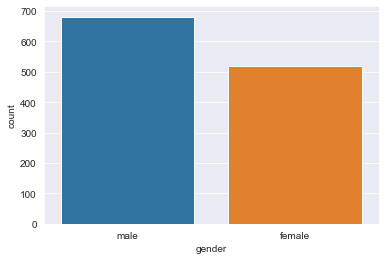

In [233]:
sns.countplot(x='gender',data=LineList)

In [246]:
strippplotdf = LineList[LineList['country'].notnull() & LineList['age'].notnull() & LineList['gender'].notnull()]

In [248]:
strippplotdf.shape

(1078, 16)

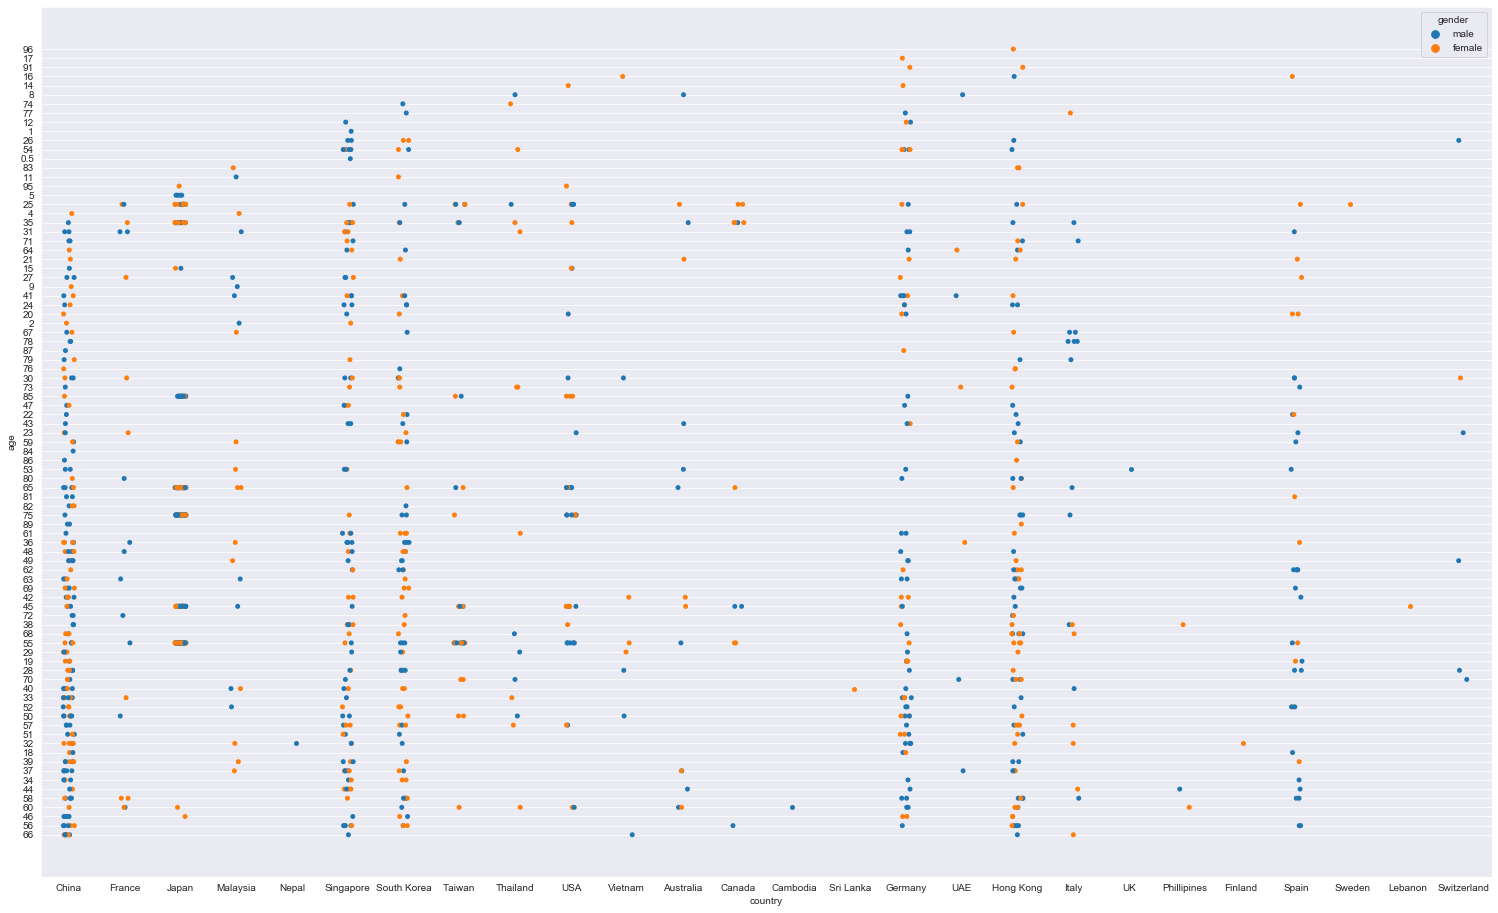

In [265]:
plt.figure(figsize=(26, 16))
sns.stripplot(x='country',y='age',data=strippplotdf,hue='gender')


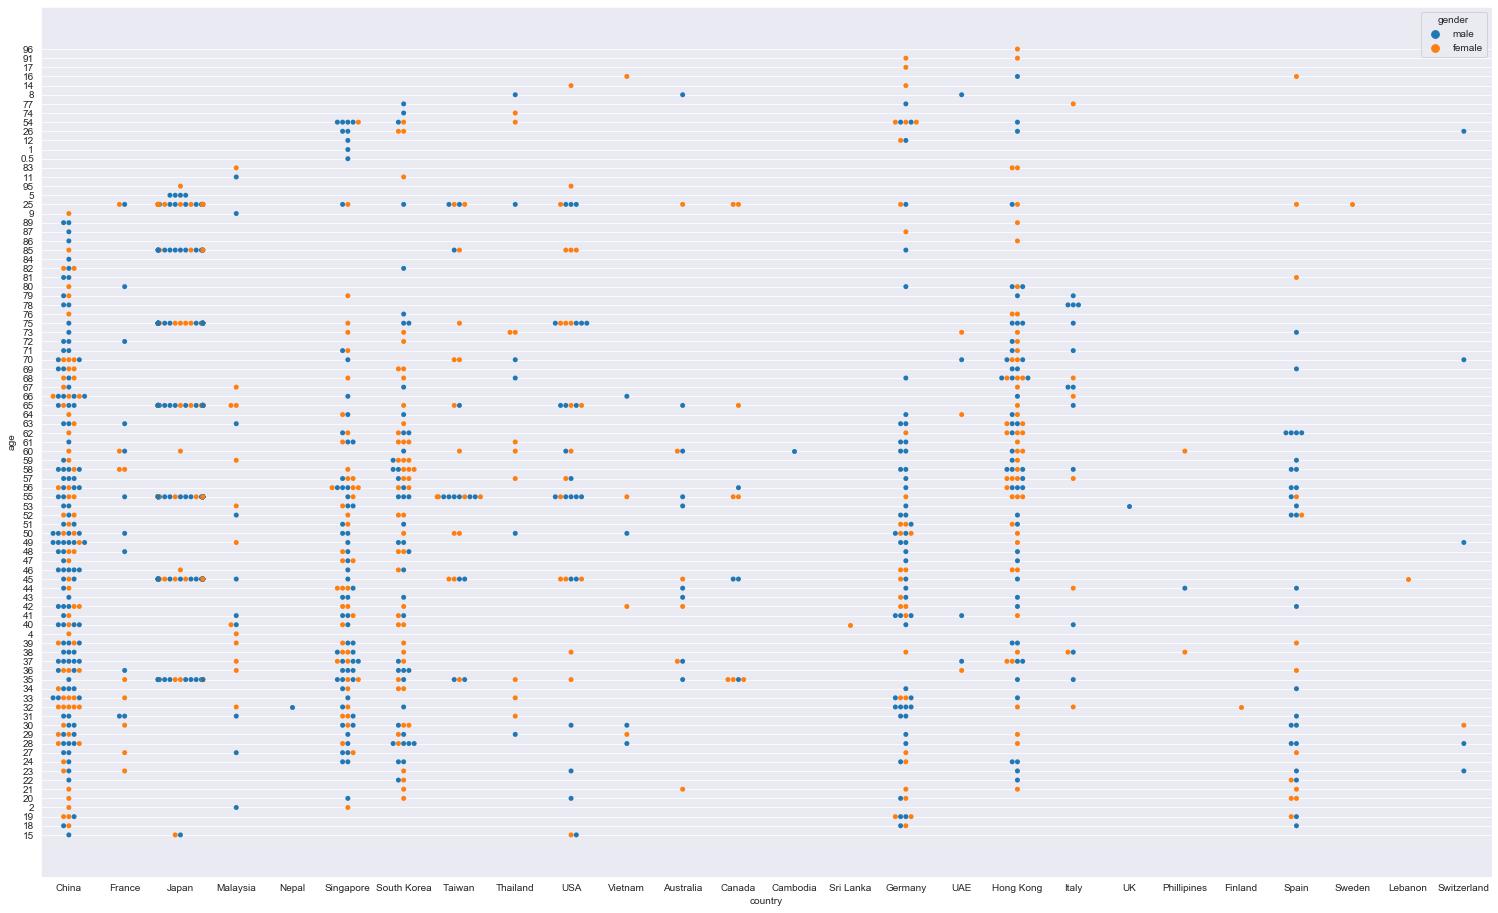

In [266]:
plt.figure(figsize=(26, 16))
sns.swarmplot(x='country',y='age',data=strippplotdf,hue='gender')

In [270]:
plt.figure(figsize=(26, 16))
sns.violinplot(x='country',y='age',data=strippplotdf)

TypeError: No loop matching the specified signature and casting
was found for ufunc add